In [1]:
# define the stocks to download
from get_stock import createCSV
import pandas as pd
import talib
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
stocks = ["MSFT"]

# define the time range for the historical data
start_date = '2015-01-01'
end_date = '2021-12-31'

myF = createCSV()
myF.update_time_range(start_date,end_date)
data = pd.DataFrame()
for stock in stocks:
    myF.process_stock(stock)
    # myF.df = myF.df.shift(1).drop(["Target", "Date", "Adj Close"], axis=1).merge(myF.df,left_index = True, right_index = True)
    data=pd.concat([data, myF.df]).dropna().sort_values(by = "Bar Time")
data.drop(["Open", "High", "Low", "Adj Close", "Target"], axis = 1, inplace = True)

[*********************100%***********************]  1 of 1 completed


In [7]:
pip install ta-lib


  Using cached TA-Lib-0.4.26.tar.gz (272 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build ta-lib


  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      <string>:77: UserWarning: Cannot find ta-lib library, installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\talib
      copying talib\abstract.py -> build\lib.win-amd64-cpython-310\talib
      copying talib\deprecated.py -> build\lib.win-amd64-cpython-310\talib
      copying talib\stream.py -> build\lib.win-amd64-cpython-310\talib
      copying talib\test_abstract.py -> build\lib.win-amd64-cpython-310\talib
      copying talib\test_data.py -> build\lib.win-amd64-cpython-310\talib
      copying talib\test_func.py -> build\lib.win-amd64-cpython-310\talib
      copying talib\test_pandas.py -> build\lib.win-amd64-cpython-310\talib
      copying talib\test_polars.py -> build\lib.

In [66]:
data["master uptrend"] = data.apply(lambda row: 1 if row.ema_120 <= row.Close else 0, axis=1)
a = data["master uptrend"]!=0
data["master uptrend count"] = a.cumsum()-a.cumsum().where(~a).ffill().fillna(0).astype(int)
data["prev_ema_9"] = data.ema_9.shift(1)
data["ema_9 increase flag"] = data.apply(lambda row: 1 if row.ema_9 >= row.prev_ema_9 else 0, axis=1)
b=data["ema_9 increase flag"]!=0
data["ema_9 increase count"] = b.cumsum()-b.cumsum().where(~b).ffill().fillna(0).astype(int)
data["ema9_larger_ema15"] = data.apply(lambda row: 1 if row.ema_9 >= row.ema_15 else 0, axis=1)
data = data.dropna()

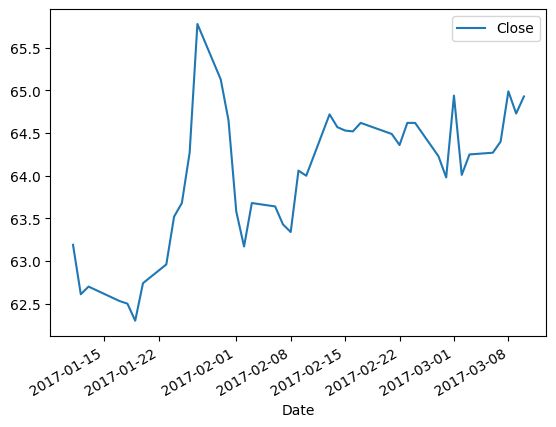

In [68]:
aa = data[(data["Date"]>="2017-01-11") & (data["Date"]<="2017-03-10")]
aa.plot(x="Date", y="Close", kind="line")
plt.show()


In [61]:
data[(data["ema9_larger_ema15"]==1) & (data["ema_9 increase count"]>=4) & (data["rsi"]>=45) & (data["master uptrend count"]>=20)].head(60)

,Date,Close,Volume,rsi,ema_9,ema_15,ema_120,master uptrend,master uptrend count,prev_ema_9,ema_9 increase flag,ema_9 increase count,ema9_larger_ema15
Bar Time,,,,,,,,,,,,,
206,2015-10-27,53.689999,50999900,79.861652,51.882244,50.133672,47.416825,1,20,50.978366,1,4,1
207,2015-10-28,53.980000,47000800,80.422449,52.581496,50.833005,47.840255,1,21,51.882244,1,5,1
208,2015-10-29,53.360001,30202100,75.576856,52.840997,51.292458,48.196368,1,22,52.581496,1,6,1
213,2015-11-05,54.380001,31468500,74.986914,53.920544,52.967646,49.791818,1,27,53.690815,1,4,1
214,2015-11-06,54.919998,32851200,76.480660,54.253695,53.322619,50.122668,1,28,53.920544,1,5,1
225,2015-11-23,54.189999,28235900,63.667394,53.951781,53.749689,51.986139,1,39,53.832672,1,4,1
226,2015-11-24,54.250000,24600000,63.976511,54.051187,53.840655,52.132194,1,40,53.951781,1,5,1
242,2015-12-17,55.700001,41280900,59.004199,55.503086,55.275322,54.116011,1,56,55.404629,1,4,1
248,2015-12-28,55.950001,22458300,58.303808,55.616389,55.417800,54.525430,1,62,55.449583,1,4,1


In [65]:
data

,Date,Close,Volume,rsi,ema_9,ema_15,ema_120,master uptrend,master uptrend count,prev_ema_9,ema_9 increase flag,ema_9 increase count,ema9_larger_ema15
Bar Time,,,,,,,,,,,,,
29,2015-02-13,43.869999,40264900,49.718402,43.027700,42.883566,44.472000,0,0,NaN,0,0,1
30,2015-02-17,43.580002,33695700,48.063314,43.211800,43.010191,44.414451,0,0,43.027700,1,1,1
31,2015-02-18,43.529999,27111700,47.768037,43.317866,43.104701,44.357390,0,0,43.211800,1,2,1
32,2015-02-19,43.500000,27603400,47.579184,43.378578,43.176574,44.302075,0,0,43.317866,1,3,1
33,2015-02-20,43.860001,29721100,50.127382,43.539052,43.300833,44.273554,0,0,43.378578,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2021-12-23,334.690002,19617800,53.838966,330.618158,330.345906,329.786421,1,2,328.582236,1,3,1
1758,2021-12-27,342.450012,19947000,59.270353,334.562109,332.546653,330.603427,1,3,330.618158,1,4,1
1759,2021-12-28,341.250000,15661500,58.131276,336.791406,334.129080,331.290303,1,4,334.562109,1,5,1


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [3]:
data[['Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume_x', 'MACD_x',
       'signal_x', 'hist_x', 'k_line_x', 'd_line_x', 'j_line_x', 'rsi_x',
       'BBand_high_x', 'BBand_low_x', 'BBand_mid_x', 'sma_5_x', 'sma_10_x',
       'sma_30_x', 'sma_60_x', 'ema_5_x', 'ema_10_x', 'ema_30_x', 'ema_60_x',
       'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume_y',
       'MACD_y', 'signal_y', 'hist_y', 'k_line_y', 'd_line_y', 'j_line_y',
       'rsi_y', 'BBand_high_y', 'BBand_low_y', 'BBand_mid_y', 'sma_5_y',
       'sma_10_y', 'sma_30_y', 'sma_60_y', 'ema_5_y', 'ema_10_y', 'ema_30_y',
       'ema_60_y']] = scaler.fit_transform(data[['Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume_x', 'MACD_x',
       'signal_x', 'hist_x', 'k_line_x', 'd_line_x', 'j_line_x', 'rsi_x',
       'BBand_high_x', 'BBand_low_x', 'BBand_mid_x', 'sma_5_x', 'sma_10_x',
       'sma_30_x', 'sma_60_x', 'ema_5_x', 'ema_10_x', 'ema_30_x', 'ema_60_x',
       'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume_y',
       'MACD_y', 'signal_y', 'hist_y', 'k_line_y', 'd_line_y', 'j_line_y',
       'rsi_y', 'BBand_high_y', 'BBand_low_y', 'BBand_mid_y', 'sma_5_y',
       'sma_10_y', 'sma_30_y', 'sma_60_y', 'ema_5_y', 'ema_10_y', 'ema_30_y',
       'ema_60_y']])


In [4]:
y_train = data.Target[0:int(2/3*len(data))]
y_test = data.Target[int(2/3*len(data)):]
X_train = data.drop(["Target", "Date", "Adj Close"], axis=1)[0:int(2/3*len(data))]
X_test = data.drop(["Target", "Date", "Adj Close"], axis=1)[int(2/3*len(data)):]
X_train

C:\Users\fuway\AppData\Local\Temp\ipykernel_1424\467551765.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = data.Target[0:int(2/3*len(data))]
C:\Users\fuway\AppData\Local\Temp\ipykernel_1424\467551765.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = data.Target[int(2/3*len(data)):]


,Open_x,High_x,Low_x,Close_x,Volume_x,MACD_x,signal_x,hist_x,k_line_x,d_line_x,...,BBand_low_y,BBand_mid_y,sma_5_y,sma_10_y,sma_30_y,sma_60_y,ema_5_y,ema_10_y,ema_30_y,ema_60_y
Bar Time,,,,,,,,,,,,,,,,,,,,,
60,0.002498,0.002590,0.003934,0.002213,0.216148,0.429701,0.409002,0.534695,0.050858,0.181888,...,0.009387,0.001426,0.001107,0.002664,0.002979,0.004147,0.001260,0.001171,0.001583,0.002271
61,0.001446,0.000939,0.002711,0.001222,0.214877,0.427093,0.407693,0.530141,0.021686,0.034161,...,0.008946,0.001028,0.000614,0.002065,0.002659,0.003817,0.000791,0.000672,0.001205,0.001949
62,0.000854,0.000065,0.001951,0.001420,0.230355,0.425662,0.406307,0.529349,0.050951,0.000000,...,0.008342,0.000550,0.000000,0.001393,0.002294,0.003502,0.000000,0.000000,0.000755,0.001589
63,0.001052,0.000000,0.001322,0.000000,0.235223,0.423153,0.404603,0.526104,0.051016,0.000056,...,0.008289,0.000412,0.000387,0.000945,0.002032,0.003227,0.000876,0.000223,0.000614,0.001386
64,0.000000,0.003366,0.001521,0.004161,0.248809,0.426779,0.404100,0.538378,0.199303,0.062753,...,0.008375,0.000188,0.000767,0.000498,0.001734,0.002871,0.001437,0.000392,0.000477,0.001188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.324997,0.320105,0.326369,0.326432,0.076006,0.490850,0.462691,0.582663,0.672379,0.688872,...,0.332971,0.326273,0.328133,0.326101,0.325802,0.335424,0.326385,0.327289,0.329016,0.330350
1190,0.328710,0.323536,0.321211,0.320620,0.174862,0.484717,0.464298,0.559970,0.469768,0.615582,...,0.333794,0.326887,0.328693,0.327191,0.325888,0.335640,0.327370,0.327964,0.329420,0.330729
1191,0.319311,0.321173,0.318401,0.327158,0.109204,0.487763,0.466305,0.564064,0.443205,0.516021,...,0.334889,0.327563,0.327673,0.327871,0.326520,0.335814,0.328226,0.328626,0.329838,0.331116


In [5]:
y_train.value_counts()

0.0    567
1.0    312
2.0    255
Name: Target, dtype: int64

In [6]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)
y_pred_weighted = []
for i in range(len(y_pred)):
    if max(y_proba[i]) >=0.8:
        y_pred_weighted.append(y_pred[i])
    else:
        y_pred_weighted.append(0)
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification report:\n", classification_report(y_test, y_pred_weighted))

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2535211267605634

Classification report:
               precision    recall  f1-score   support

         0.0       0.29      0.55      0.38       216
         1.0       0.00      0.00      0.00       192
         2.0       0.17      0.16      0.16       160

    accuracy                           0.25       568
   macro avg       0.15      0.24      0.18       568
weighted avg       0.16      0.25      0.19       568

Accuracy: 0.29225352112676056

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       216
         1.0       0.55      0.09      0.15       192
         2.0       0.28      0.93      0.43       160

    accuracy                           0.29       568
   macro avg       0.28      0.34      0.19       568
weighted avg       0.26      0.29      0.17       568



C:\Users\fuway\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fuway\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fuway\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [10]:
sample_weights = []
for i in y_train:
    if i == 0:
        sample_weights.append(1)
    elif i==1:
        sample_weights.append(20)
    else:
        sample_weights.append(10)

In [8]:
import xgboost as xgb

# For classification problems
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)
y_pred_weighted = []
for i in range(len(y_pred)):
    if max(y_proba[i]) >=0.7:
        y_pred_weighted.append(y_pred[i])
    else:
        y_pred_weighted.append(0)
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification report:\n", classification_report(y_test, y_pred_weighted))

Accuracy: 0.28169014084507044

Classification report:
               precision    recall  f1-score   support

         0.0       0.23      0.01      0.03       216
         1.0       0.50      0.01      0.02       192
         2.0       0.28      0.97      0.44       160

    accuracy                           0.28       568
   macro avg       0.34      0.33      0.16       568
weighted avg       0.34      0.28      0.14       568



In [11]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'max_leaf_nodes': [2,4, 8, 16, 32],
    'gamma': [0, 0.2, 0.4],
    'eta': [0.1, 0.2, 0.4],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'lambda': [0.5, 1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train, sample_weight = sample_weights)

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits
[22:11:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'eta': [0.1, 0.2, 0.4], 'gamma': [0, 0.2, 0.4],
                         'lambda': [0.5, 1, 2], 'max_depth': [3, 5, 10, 20],
                         'max_leaf_nodes': [2, 4, 8, 16, 32]},
             verbose=2)

In [13]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_proba = grid_search.best_estimator_.predict_proba(X_test)
y_pred_weighted = []
for i in range(len(y_pred)):
    if max(y_proba[i]) >=0.5:
        y_pred_weighted.append(y_pred[i])
    else:
        y_pred_weighted.append(0)
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification report:\n", classification_report(y_test, y_pred_weighted))

Accuracy: 0.29401408450704225

Classification report:
               precision    recall  f1-score   support

         0.0       0.43      0.04      0.08       216
         1.0       0.60      0.02      0.03       192
         2.0       0.29      0.97      0.44       160

    accuracy                           0.29       568
   macro avg       0.44      0.34      0.18       568
weighted avg       0.45      0.29      0.16       568



In [16]:
import re
re.findall(r"[a-zA-Z0-9]+", "as_b")

['as', 'b']

In [18]:
def jaro_similarity(s1, s2):
    s1_len = len(s1)
    s2_len = len(s2)

    if s1_len == 0 and s2_len == 0:
        return 1

    match_distance = (max(s1_len, s2_len) // 2) - 1
    s1_matches = [False] * s1_len
    s2_matches = [False] * s2_len

    matches = 0
    transpositions = 0

    for i in range(s1_len):
        start = max(0, i - match_distance)
        end = min(i + match_distance + 1, s2_len)

        for j in range(start, end):
            if s2_matches[j]:
                continue
            if s1[i] != s2[j]:
                continue

            s1_matches[i] = True
            s2_matches[j] = True
            matches += 1
            break

    if matches == 0:
        return 0

    k = 0
    for i in range(s1_len):
        if not s1_matches[i]:
            continue

        while not s2_matches[k]:
            k += 1

        if s1[i] != s2[k]:
            transpositions += 1

        k += 1

    return ((matches / s1_len) + (matches / s2_len) + ((matches - transpositions / 2) / matches)) / 3


def jaro_winkler_similarity(s1, s2, p=0.1):
    jaro_sim = jaro_similarity(s1, s2)

    prefix_len = 0
    for i in range(min(len(s1), len(s2))):
        if s1[i] == s2[i]:
            prefix_len += 1
        else:
            break

    return jaro_sim + (prefix_len * p * (1 - jaro_sim))


word1 = "Australia"
word2 = "Australasia"

similarity = jaro_similarity(word1, word2)
print(similarity)

0.9023569023569024
